Name: Qi Li

Student ID: 1005299302

Course: INF2178-Experimental Design for Data Science

Instructor: Shion Guha

Content: Technical Assignment II

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=b489d25baefcd1a78fe7fce15e0ee760237c4373c8cae676f6c98224586e5d32
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit


In [2]:
# Load and review the dataset
df = pd.read_excel('/content/INF2178_A2_data.xlsx')
df.head()

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y


**One-Way ANOVA**


In [3]:
# Reshape the Dataframe to long format for statsmodels package
df_melt = pd.melt(df.reset_index(), id_vars = ['index'],
                  value_vars = ['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE'])
df_melt.columns = ['index', 'types', 'space']
df_melt

,index,types,space
0,0,IGSPACE,0
1,1,IGSPACE,0
2,2,IGSPACE,0
3,3,IGSPACE,10
4,4,IGSPACE,0
...,...,...,...
5310,1058,SGSPACE,60
5311,1059,SGSPACE,0
5312,1060,SGSPACE,0
5313,1061,SGSPACE,30


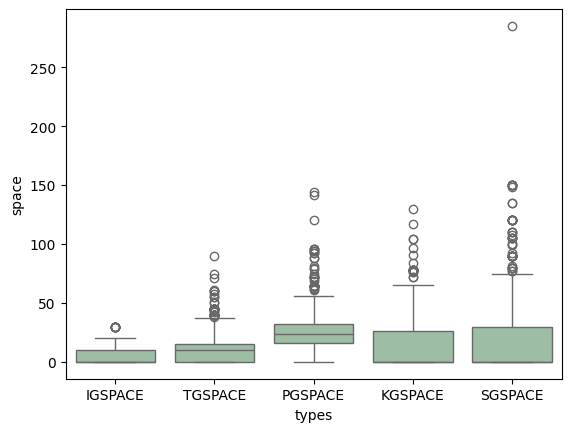

In [4]:
# Generate a boxplot to overview the distribution of spaces by age group
ax = sns.boxplot(x='types', y='space', data=df_melt, color='#99c2a2')
#ax = sns.swarmplot(x="types", y="space", data=df_melt, color='#7d0013')#too many points
plt.show()

It seems that there are differences in means across different age groups. The next step is to use one-way ANOVA to determine whether these differences are statistically significant.

Null hypothesis: There is no significant difference in childcare space availability among different age groups.

Alternative hypothesis: There is a significant difference in childcare space availability for at least two age groups.

In [5]:
# Create an Ordinary Least Squares (OLS) model in 'statsmodels'
model = ols('space ~ C(types)', data = df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(types),2.821233e+05,4.0,188.190768,4.517383e-151
Residual,1.990101e+06,5310.0,NaN,NaN


In [6]:
# ANOVA table using different library('bioinfokit')
res = stat()
res.anova_stat(df=df_melt, res_var='space', anova_model='space ~ C(types)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(types),4.0,2.821233e+05,70530.816839,188.190768,4.517383e-151
Residual,5310.0,1.990101e+06,374.783617,NaN,NaN


With a p-value of 4.517383e-151, which is significantly lower than the threshold of 0.05, the null hypothesis is rejected. This indicates that there are statistically significant differences in means across at least some of the age groups. Therefore, proceeding with a post-hoc test is warranted to compare the differences between each pairing.

In [21]:
# Post-hoc test using Tukey's HSD to do pair-wise comparison
res = stat()
res.tukey_hsd(df=df_melt, res_var='space', xfac_var='types', anova_model='space ~ C(types)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,IGSPACE,TGSPACE,7.703669,5.412308,9.995029,12.974001,0.001000
1,IGSPACE,PGSPACE,20.362183,18.070822,22.653543,34.292619,0.001000
2,IGSPACE,KGSPACE,10.361242,8.069881,12.652602,17.449707,0.001000
3,IGSPACE,SGSPACE,17.764817,15.473456,20.056177,29.918310,0.001000
4,TGSPACE,PGSPACE,12.658514,10.367153,14.949874,21.318618,0.001000
5,TGSPACE,KGSPACE,2.657573,0.366213,4.948933,4.475706,0.013527
6,TGSPACE,SGSPACE,10.061148,7.769787,12.352508,16.944309,0.001000
7,PGSPACE,KGSPACE,10.000941,7.709580,12.292301,16.842912,0.001000
8,PGSPACE,SGSPACE,2.597366,0.306006,4.888726,4.374309,0.017028
9,KGSPACE,SGSPACE,7.403575,5.112214,9.694935,12.468603,0.001000


Each pairwise comparison between the age groups yielded p-values less than 0.05, indicating that the differences between every two age groups are statistically significant.

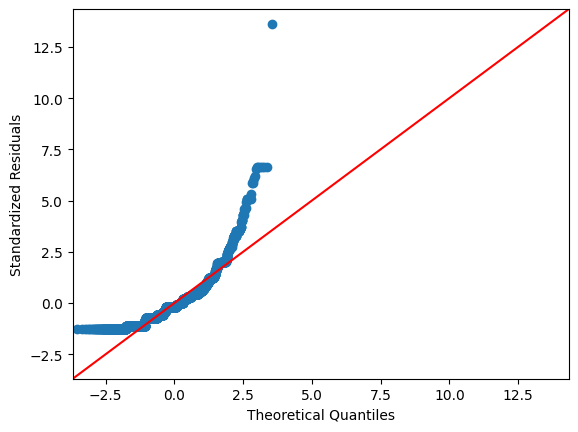

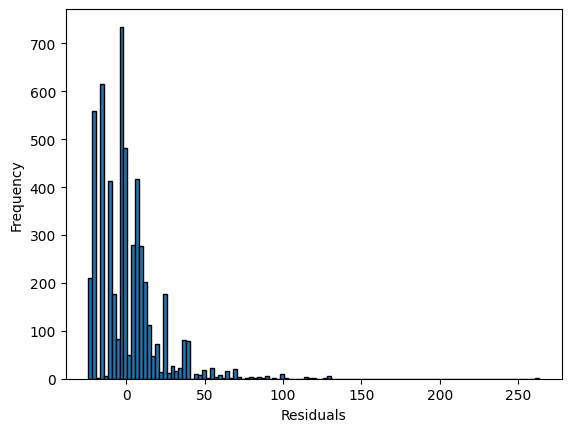

In [8]:
# Visually check the normality assumption
# Q-Q plot
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()
# Histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [9]:
#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

0.8427014350891113 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The p-value of Shapiro Wilk test is less than 0.001(but not exactly zero because the result doesn't include enough significant digits) and less than the conventional significance level like 0.05.

The warning message indicates the result may not be accurate for a large sample size like this we have. Combined with the visual displays of Q-Q plot and histogram above, the normality assumption is likely violated. However, we can still proceed with ANOVA and the Levene's test to test homogenous varainces assumption as the ANOVA model is quite robust.

In [10]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=df_melt, res_var='space', xfac_var='types')
res.levene_summary

,Parameter,Value
0,Test statistics (W),142.6228
1,Degrees of freedom (Df),4.0000
2,p value,0.0000


The p-value of Levene's test is less than 0.001(but not exactly zero because the result doesn't include enough significant digits) and less than the conventional significance level like 0.05.

The null hypothesis about the variances of the samples taken from different populations being equal is rejected. Hence, the assumption of homogenous variances is violated.

**Two-Way ANOVA**

In [11]:
# Reshape the DataFrame to long format and include the 'subsidy' as the second independent variable
df_melt2 = pd.melt(df, id_vars=['subsidy'],\
                 value_vars=['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE','SGSPACE'])
df_melt2.columns = ['subsidy', 'types', 'space']
df_melt2

,subsidy,types,space
0,Y,IGSPACE,0
1,Y,IGSPACE,0
2,Y,IGSPACE,0
3,Y,IGSPACE,10
4,Y,IGSPACE,0
...,...,...,...
5310,Y,SGSPACE,60
5311,N,SGSPACE,0
5312,N,SGSPACE,0
5313,Y,SGSPACE,30


<Axes: xlabel='subsidy', ylabel='space'>

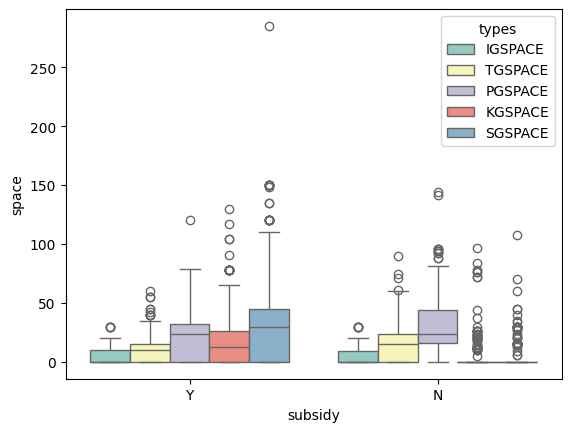

In [12]:
# Boxplot of spaces by both 'subsidy' and age groups
sns.boxplot(x="subsidy", y="space", hue="types",data=df_melt2, palette="Set3")

Distinct variations emerge across various age groups, both with and without subsidy. The impact of subsidies on childcare spaces for both KGSPACE and SGSPACE is discernible through visual inspection of the boxplot. To rigorously test for significant main effects and explore potential interaction effects, a two-way ANOVA analysis will be used.

In [13]:
# Create an Ordinary Least Squares (OLS) model in 'statsmodels' with interaction term
model = ols('space ~ C(subsidy) + C(types) + C(subsidy):C(types)', data=df_melt2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(subsidy),3.215308e+04,1.0,98.168364,6.073586e-23
C(types),2.821233e+05,4.0,215.341584,1.758733e-171
C(subsidy):C(types),2.204016e+05,4.0,168.230101,8.040792e-136
Residual,1.737546e+06,5305.0,NaN,NaN


In [14]:
# ANOVA table using different library('bioinfokit')
res = stat()
res.anova_stat(df=df_melt2, res_var='space', anova_model='space ~ C(subsidy) + C(types) + C(subsidy):C(types)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(subsidy),1.0,3.215308e+04,32153.078590,98.168364,6.073586e-23
C(types),4.0,2.821233e+05,70530.816839,215.341584,1.758733e-171
C(subsidy):C(types),4.0,2.204016e+05,55100.395296,168.230101,8.040792e-136
Residual,5305.0,1.737546e+06,327.529943,NaN,NaN


All main effects of subsidy and age group, as well as their interaction effect, exhibit statistical significance, indicated by p-values below the significance level of 0.05.

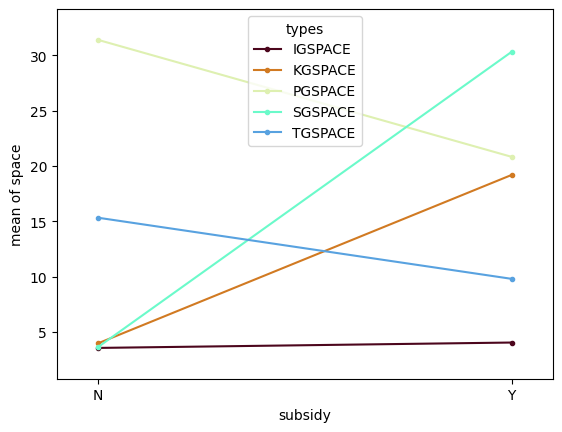

In [15]:
# Interaction Plot as visual representation of main effects and interaction effect
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(x = df_melt2['subsidy'], trace = df_melt2['types'], response = df_melt2['space'],\
                       colors=['#4c061d','#d17a22','#def0b1','#6bfaca','#58a2e0'])
plt.show()

In [16]:
# Post-hoc test by different age groups
res.tukey_hsd(df = df_melt2, res_var = 'space',xfac_var = 'types',\
              anova_model = 'space ~ C(subsidy) + C(types) + C(subsidy):C(types)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,IGSPACE,TGSPACE,7.703669,5.561623,9.845715,13.878379,0.001000
1,IGSPACE,PGSPACE,20.362183,18.220137,22.504228,36.683051,0.001000
2,IGSPACE,KGSPACE,10.361242,8.219196,12.503288,18.666072,0.001000
3,IGSPACE,SGSPACE,17.764817,15.622771,19.906862,32.003823,0.001000
4,TGSPACE,PGSPACE,12.658514,10.516468,14.800559,22.804673,0.001000
5,TGSPACE,KGSPACE,2.657573,0.515527,4.799619,4.787693,0.006429
6,TGSPACE,SGSPACE,10.061148,7.919102,12.203193,18.125444,0.001000
7,PGSPACE,KGSPACE,10.000941,7.858895,12.142987,18.016979,0.001000
8,PGSPACE,SGSPACE,2.597366,0.455320,4.739412,4.679229,0.008380
9,KGSPACE,SGSPACE,7.403575,5.261529,9.545621,13.337751,0.001000


Each pairwise comparison between the age groups yielded p-values less than 0.05, indicating that the differences between every two age groups are statistically significant.

In [17]:
# Post-hoc test by whether being subsidized
res.tukey_hsd(df = df_melt2, res_var = 'space',xfac_var = 'subsidy',\
              anova_model = 'space ~ C(subsidy) + C(types) + C(subsidy):C(types)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Y,N,5.253166,4.213767,6.292566,14.012021,0.001


There is a statistically significant difference in means between the subsidy status of 'Y' and 'N', as indicated by the p-value of 0.001, which is less than the significance level of 0.05.

In [22]:
# Post-hoc test by both age groups and 'subsidy' (i.e. interaction term)
res.tukey_hsd(df = df_melt2, res_var = 'space', xfac_var = ['subsidy','types'],\
              anova_model = 'space ~ C(subsidy) + C(types) + C(subsidy):C(types)')
res.tukey_summary.head()

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Y, IGSPACE)","(Y, TGSPACE)",5.754875,2.731709,8.778040,8.520647,0.001
1,"(Y, IGSPACE)","(Y, PGSPACE)",16.777159,13.753993,19.800324,24.840202,0.001
2,"(Y, IGSPACE)","(Y, KGSPACE)",15.137883,12.114717,18.161049,22.413097,0.001
3,"(Y, IGSPACE)","(Y, SGSPACE)",26.257660,23.234495,29.280826,38.877000,0.001
4,"(Y, IGSPACE)","(N, IGSPACE)",0.486202,-3.266154,4.238558,0.579977,0.900


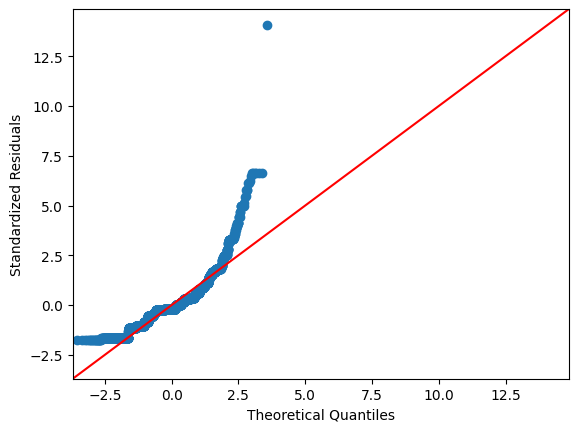

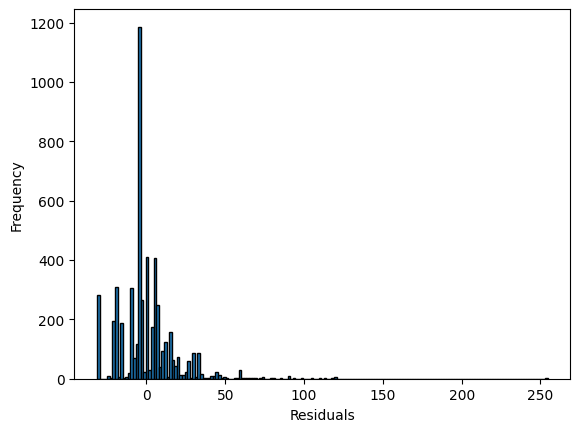

In [19]:
# Visually check the normality assumption
# Q-Q plot
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()
# Histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [ ]:
#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

0.8573694825172424 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The p-value of Shapiro Wilk test is less than 0.001(but not exactly zero because the result doesn't include enough significant digits) and less than the conventional significance level like 0.05.

The warning message indicates the result may not be accurate for a large sample size like this we have. Combined with the visual displays of Q-Q plot and histogram above, the normality assumption is likely violated. However, we can still proceed with ANOVA and the Levene's test to test homogenous varainces assumption as the ANOVA model is quite robust.

In [23]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=df_melt2, res_var='space', xfac_var=['types','subsidy'])
res.levene_summary

,Parameter,Value
0,Test statistics (W),167.8291
1,Degrees of freedom (Df),9.0000
2,p value,0.0000


The p-value of Levene's test is less than 0.001(but not exactly zero because the result doesn't include enough significant digits) and less than the conventional significance level like 0.05.

The null hypothesis about the variances of the samples taken from different populations being equal is rejected. Hence, the assumption of homogenous variances is violated.